# Proceso General de Optimización Bayesiana

La optimización bayesiana es una técnica utilizada para optimizar funciones costosas de evaluar. El proceso general se puede descomponer en los siguientes pasos:

## 1. Construcción del Modelo

Inicialmente, se construye un modelo probabilístico de la función objetivo. Generalmente, se utiliza un proceso gaussiano (GP) que se ajusta a las evaluaciones disponibles de la función objetivo.

## 2. Optimización de la Función de Adquisición

La función de adquisición se optimiza para seleccionar el siguiente punto a evaluar. Esta función equilibra la explotación de las áreas del espacio de búsqueda que ya se conocen como prometedoras y la exploración de nuevas áreas para descubrir posibles mejores soluciones. Las funciones de adquisición más comunes incluyen:

- **Expected Improvement (EI)**
- **Probability of Improvement (PI)**
- **Upper Confidence Bound (UCB)**
- **Entropy Search**

## 3. Evaluación del Nuevo Punto

El punto seleccionado a través de la optimización de la función de adquisición se evalúa utilizando la función objetivo real.

## 4. Actualización del Modelo

El modelo probabilístico se actualiza con la nueva información obtenida de la evaluación del nuevo punto, mejorando así su precisión.

## 5. Repetición

Se repiten los pasos del 2 al 4 hasta que se cumpla un criterio de parada. Los criterios de parada comunes incluyen alcanzar un número máximo de evaluaciones o converger a una solución suficientemente buena.

---

Este proceso se repite iterativamente, utilizando la función de adquisición para guiar la selección de los puntos más prometedores y actualizando el modelo probabilístico con cada nueva evaluación.


In [1]:
import numpy as np
np.random.seed(237)
import matplotlib.pyplot as plt

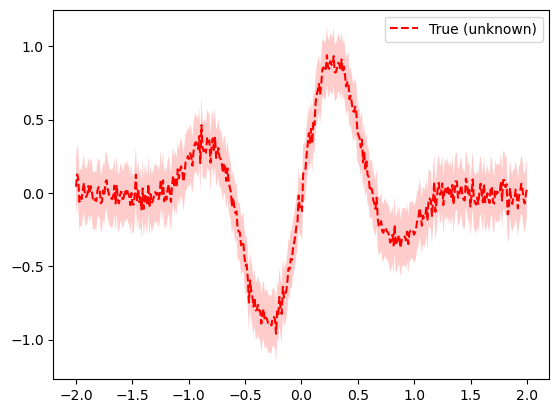

In [2]:
noise_level = 0.1

def f(x, noise_level=noise_level):
    return np.sin(5 * x[0]) * (1 - np.tanh(x[0] ** 2))\
           + np.random.randn() * noise_level

x = np.linspace(-2, 2, 400).reshape(-1, 1)
fx = [f(x_i, noise_level=.05) for x_i in x]

plt.plot(x, fx, "r--", label="True (unknown)")
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate(([fx_i - 1.9600 * noise_level for fx_i in fx], # 1.96 --> para un intervalo de confianza del 95%
                         [fx_i + 1.9600 * noise_level for fx_i in fx[::-1]])),
         alpha=.2, fc="r", ec="None")
plt.legend()
plt.show()

x^*=-0.3552, f(x^*)=-1.0079


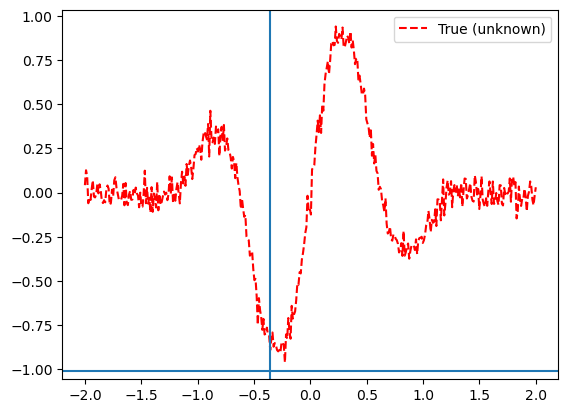

In [3]:
from skopt import gp_minimize

res = gp_minimize(f,                  # the function to minimize
                  [(-2.0, 2.0)],      # the bounds on each dimension of x
                  acq_func="EI",      # the acquisition function
                  n_calls=15,         # the number of evaluations of f
                  n_random_starts=5,  # the number of random initialization points
                  noise=0.1**2,       # the noise level (optional)
                  random_state=1234)   # the random seed

print("x^*=%.4f, f(x^*)=%.4f" % (res.x[0], res.fun))

plt.plot(x, fx, "r--", label="True (unknown)")
plt.axvline(res.x[0])
plt.axhline(res.fun)
plt.legend()
plt.show()


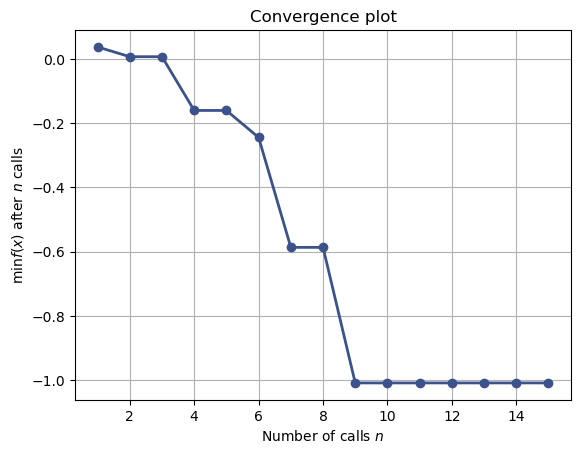

In [4]:
from skopt.plots import plot_convergence
plot_convergence(res);

In [6]:
def f_wo_noise(x):
    return f(x, noise_level=0)

Izq: Construccion del modelo probabilistico (proceso gaussiano en verde) de la funcion objetivo
Der: funcion de adquisicion | Selecciona el siguiente punto a evaluar


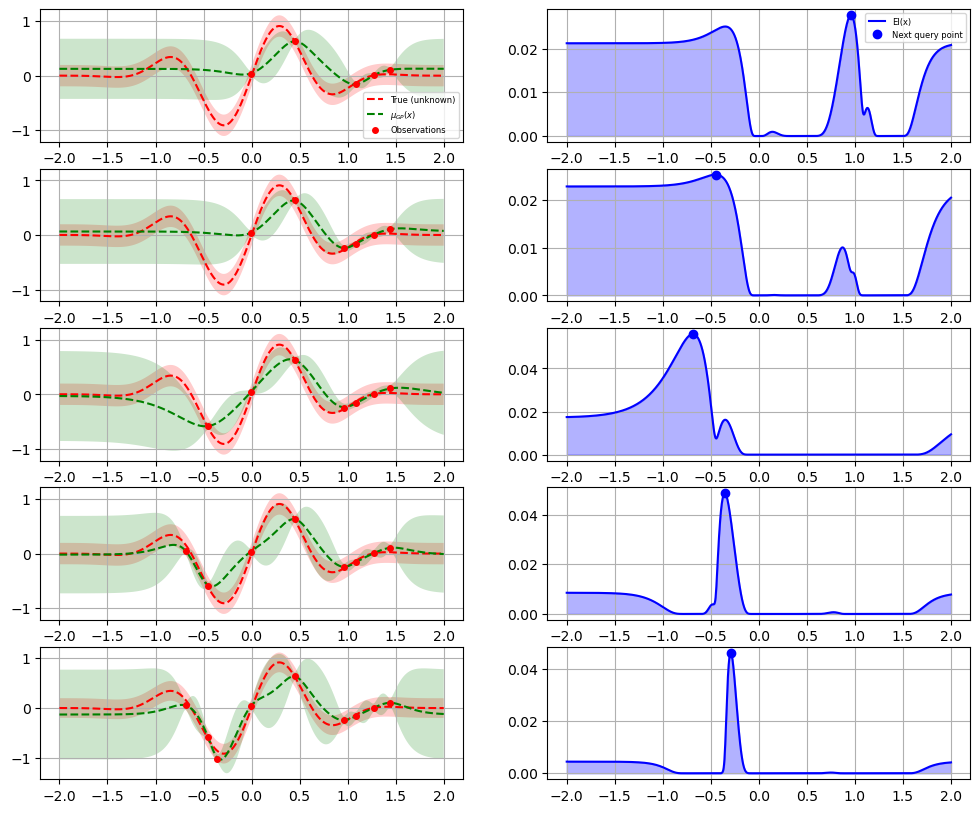

In [8]:
from skopt.plots import plot_gaussian_process

print('Izq: Construccion del modelo probabilistico (proceso gaussiano en verde) de la funcion objetivo')
print('Der: funcion de adquisicion | Selecciona el siguiente punto a evaluar')

plt.figure(figsize=(12, 10))

for n_iter in range(5):
    # Plot true function.
    plt.subplot(5, 2, 2*n_iter+1)


    if n_iter == 0:
        show_legend = True
    else:
        show_legend = False

    ax = plot_gaussian_process(res, n_calls=n_iter,
                               objective=f_wo_noise,
                               noise_level=noise_level,
                               show_legend=show_legend, show_title=False,
                               show_next_point=False, show_acq_func=False)
    ax.set_ylabel("")
    ax.set_xlabel("")
    # Plot EI(x)
    plt.subplot(5, 2, 2*n_iter+2)
    ax = plot_gaussian_process(res, n_calls=n_iter,
                               show_legend=show_legend, show_title=False,
                               show_mu=False, show_acq_func=True,
                               show_observations=False,
                               show_next_point=True)
    ax.set_ylabel("")
    ax.set_xlabel("")

plt.show()